#### 옵티마이저 종료
- GD > SGD > Momentum(스텝방향)    > NAG(관성) > Adam
- GD > SGD > Adagrad(스텝크기조절) > AdaDelta  > Adam
#### API
- 텐서플로우: 로우레벨 API
- 케라스: 하이레벨 API
- 케라스: 텐서플로우를 사용하기 쉽도록 클래스화 시킴(단점: 내부구조를 몰라서 응용력이 떨어진다)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [5]:
df = pd.read_csv('data/cars.csv')
df.columns = ['speed','dist'] # 컬럼명 변경(speed:자동차속도, dist:제동거리)
display(df.head(4))

x_data = df['speed'].values # 자동차 속도
y_data = df['dist'].values  # 자동차 제동거리

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22


In [38]:
# units:라벨의 갯수, input_dim:특성데이터갯수
IO = Dense(units=1, input_dim=1) # w, b 정의
model = Sequential([IO]) # 시퀀스에 Dense를 쌓는다
# loss: 손실률 > 적을 수록 좋다
model.compile(loss='mse', optimizer=Adam(0.1)) # mes: Mean Square Error
history = model.fit(x_data, y_data, epochs=500) # 학습 500회 결과 history

df = pd.DataFrame(history.history)
df

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 2244.0886
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 1947.0094
Epoch 3/10
2/2 [==============================] - 0s 4ms/step - loss: 1677.8387
Epoch 4/10
2/2 [==============================] - 0s 4ms/step - loss: 1445.2372
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 1216.8354
Epoch 6/10
2/2 [==============================] - 0s 4ms/step - loss: 1021.2935
Epoch 7/10
2/2 [==============================] - 0s 3ms/step - loss: 858.4537
Epoch 8/10
2/2 [==============================] - 0s 5ms/step - loss: 725.7053
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 606.6735
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 504.7147


,loss
0,2244.088623
1,1947.009399
2,1677.838745
3,1445.237183
4,1216.835449
5,1021.293457
6,858.453735
7,725.705322
8,606.673523
9,504.714722


w:1.985256, b:1.840320


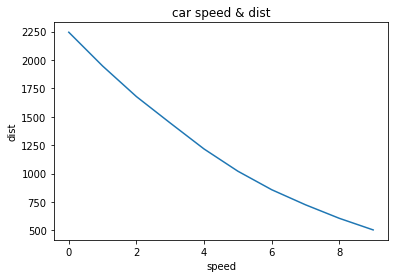

In [39]:
w, b = IO.get_weights()
print('w:%f, b:%f' % (w,b))

history_loss = history.history['loss'] # 학습결과 보기

plt.title('car speed & dist')
plt.xlabel('speed')
plt.ylabel('dist')
plt.plot(history_loss)
plt.show()


In [24]:
# 자동차 속도 10, 15에 대한 제동거리 예측값
model.predict([10,15])

array([[24.276634],
       [42.114704]], dtype=float32)

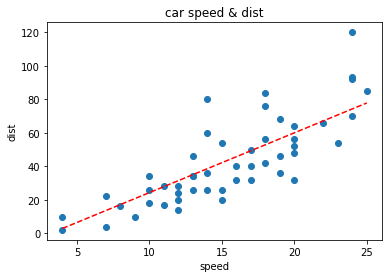

In [35]:
model_loss = model.predict(history_loss)

plt.title('car speed & dist')
plt.xlabel('speed')
plt.ylabel('dist')
plt.scatter(x_data, y_data)
plt.plot(x_data, model.predict(x_data), 'r--')
plt.show()